In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

In [20]:
# For a single neuron the value would be inputs*weights + bias
inputs = np.array([1,2,3,2.5])
weights = np.array([0.2,0.8,-0.5,1.0])
bias = 2

output = np.dot(inputs, weights) + bias
print(output)

4.8


In [19]:
# for multiple neurons

inputs = np.array([1,2,3,2.5])
weights = np.array([[0.2,0.8,-0.5,1.0],
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)

[4.8   1.21  2.385]


In [28]:
# for multiple inputs

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5,2.7,3.3, -0.8]]

weights = np.array([[0.2,0.8,-0.5,1.0],  # this weight index is for next neurons input weights, it is then transposed
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)
# Number of columns indicate the number of neurons/outputs present in the next layer

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [33]:
# for multiple inputs

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5,2.7,3.3, -0.8]]

weights1 = np.array([[0.2,0.8,-0.5,1.0], 
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases1 = np.array([2,3,0.5])

# Supposing the next layer has 3 neurons
# the weights2 shape should be rows = number of neurons, columns = number of columns in the previous layers output

weights2 = np.array([[0.1,-0.14,0.5],
                    [-0.5, 0.12, -0.33],
                    [-0.44,0.73,-0.13]])

biases2 = np.array([-1,2,-0.5])

layer1_outputs = np.dot(inputs, weights.T)+biases
print(layer1_outputs)
print(layer1_outputs.shape)
print()
layer2_outputs = np.dot(layer1_outputs, weights2.T)+biases2
print(layer2_outputs)
print(layer2_outputs.shape)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
(3, 3)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]
(3, 3)


In [34]:
from nnfs.datasets import spiral_data

In [35]:
import nnfs
import numpy as np

nnfs.init()

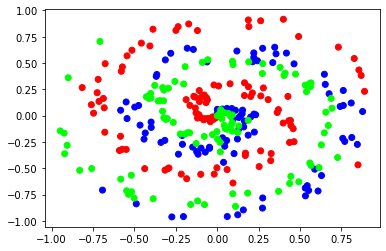

In [64]:
X,y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='brg')
plt.show()

In [65]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_neurons, n_inputs)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights.T) + self.biases
        
class Activation_ReLU:
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [66]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense1.forward(X)
activation1.forward(dense1.output)

In [67]:
activation1.output[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.3184947e-05, 0.0000000e+00],
       [0.0000000e+00, 4.3972701e-05, 0.0000000e+00],
       [0.0000000e+00, 1.5195628e-04, 0.0000000e+00],
       [0.0000000e+00, 3.0082054e-04, 3.5747789e-06]], dtype=float32)